<a href="https://colab.research.google.com/github/mto0501/Internetprojects/blob/main/Find_The_Worst_%26_Best_Months_To_Invest_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 5.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb

In [7]:
df = wb.DataReader("^GSPC",data_source="yahoo",start="1974-12-31")

In [8]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1974-12-31,69.040001,67.150002,0.0,68.559998,20970000,68.559998
1975-01-02,70.919998,68.650002,0.0,70.230003,14800000,70.230003
1975-01-03,71.639999,69.290001,0.0,70.709999,15270000,70.709999
1975-01-06,72.239998,70.330002,0.0,71.070000,17550000,71.070000
1975-01-07,71.750000,69.919998,0.0,71.019997,14890000,71.019997


In [9]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-30,4537.359863,4513.759766,4513.759766,4528.790039,2557300000,4528.790039
2021-08-31,4531.390137,4515.799805,4529.750000,4522.680176,3090380000,4522.680176
2021-09-01,4537.109863,4522.020020,4528.799805,4524.089844,3101830000,4524.089844
2021-09-02,4545.850098,4524.660156,4534.479980,4536.950195,2897010000,4536.950195
2021-09-03,4541.450195,4521.299805,4532.419922,4535.430176,2609660000,4535.430176


In [22]:
# Create lists to store the reuturn of each day in that month
Jan = []
Feb = []
Mar = []
Apr = []
May = []
June = []
July = []
Aug = []
Sept = []
Oct = []
Nov = []
Dec = []

# Create a function to get the returns for each month and append it to the corresponding list:
def get_returns(month, returns):
  if month == "01":
    Jan.append(float(returns))
  elif month == "02":
    Feb.append(float(returns))
  elif month == "03":
    Mar.append(float(returns))
  elif month == "04":
    Apr.append(float(returns))
  elif month == "05":
    May.append(float(returns))
  elif month == "06":
    June.append(float(returns))
  elif month == "07":
    July.append(float(returns))
  elif month == "08":
    Aug.append(float(returns))
  elif month == "09":
    Sept.append(float(returns))
  elif month == "10":
    Oct.append(float(returns))
  elif month == "11":
    Nov.append(float(returns))
  elif month == "12":
    Dec.append(float(returns))
  else:
    print("Something is wrong with the input for month")
    

In [23]:
# Calculate and show the daily simple returns
DSR = df["Close"].pct_change(1)
df["DSR"] = DSR
# Show data
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,High,Low,Open,Close,Volume,Adj Close,DSR
Date,,,,,,,
1975-01-03,71.639999,69.290001,0.000000,70.709999,15270000,70.709999,NaN
1975-01-06,72.239998,70.330002,0.000000,71.070000,17550000,71.070000,0.005091
1975-01-07,71.750000,69.919998,0.000000,71.019997,14890000,71.019997,-0.000704
1975-01-08,71.529999,69.650002,0.000000,70.040001,15600000,70.040001,-0.013799
1975-01-09,71.419998,69.040001,0.000000,71.169998,16340000,71.169998,0.016134
...,...,...,...,...,...,...,...
2021-08-30,4537.359863,4513.759766,4513.759766,4528.790039,2557300000,4528.790039,0.004307
2021-08-31,4531.390137,4515.799805,4529.750000,4522.680176,3090380000,4522.680176,-0.001349
2021-09-01,4537.109863,4522.020020,4528.799805,4524.089844,3101830000,4524.089844,0.000312


In [24]:
# Remove the first row of data from the data set
df = df[1:]
df

,High,Low,Open,Close,Volume,Adj Close,DSR
Date,,,,,,,
1975-01-06,72.239998,70.330002,0.000000,71.070000,17550000,71.070000,0.005091
1975-01-07,71.750000,69.919998,0.000000,71.019997,14890000,71.019997,-0.000704
1975-01-08,71.529999,69.650002,0.000000,70.040001,15600000,70.040001,-0.013799
1975-01-09,71.419998,69.040001,0.000000,71.169998,16340000,71.169998,0.016134
1975-01-10,73.750000,71.599998,0.000000,72.610001,25890000,72.610001,0.020233
...,...,...,...,...,...,...,...
2021-08-30,4537.359863,4513.759766,4513.759766,4528.790039,2557300000,4528.790039,0.004307
2021-08-31,4531.390137,4515.799805,4529.750000,4522.680176,3090380000,4522.680176,-0.001349
2021-09-01,4537.109863,4522.020020,4528.799805,4524.089844,3101830000,4524.089844,0.000312


In [25]:
# Create a loop to gather the daily returns of each month 
# append them to the lists
for i in range(0,len(df)):
  df_date = str(df.index[i])
  df_returns = df["DSR"][i]
  df_month = df_date.split("-")[1]
  # add the returns to the list corresponding to that month
  get_returns(df_month,df_returns)

In [26]:
# Create a function to average the returns of each month
def AVG(month):
  return[sum(month)/len(month)]

In [30]:
# Create a new dataFrame
df_AVG =  pd.DataFrame()
# Get the average returns for each month and add the values under new column "AVG"
df_AVG["AVG"] = AVG(Jan) + AVG(Feb) + AVG(Mar) + AVG(Apr) + AVG(May) + AVG(June) + AVG(July) + AVG(Aug) + AVG(Sept) + AVG(Oct) + AVG(Nov) + AVG(Dec) 
# Set the index to be the corresponding integer value of the month
df_AVG = df_AVG.set_index(df_AVG.index + 1 )

In [31]:
# Show the avg monthly returns 
df_AVG *100

,AVG
1,0.057318
2,0.007857
3,0.049571
4,0.099217
5,0.037979
6,0.030297
7,0.040919
8,0.012098
9,-0.026927
10,0.029280


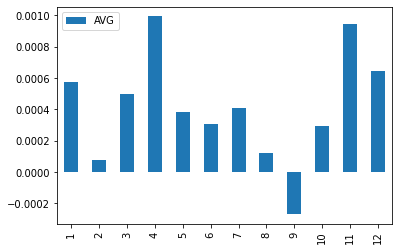

In [32]:
# Plot the Average Monthly Returns
df_AVG.plot.bar()